In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing as HWES

In [ ]:
df = pd.read_csv('/content/Forecast_Data_Skripsi.csv',header=0, index_col=[0])
df.head()

,Need_Stock
Period_Triwulan,
2017-1,118344
2017-2,155860
2017-3,134743
2017-4,91053
2018-1,307695


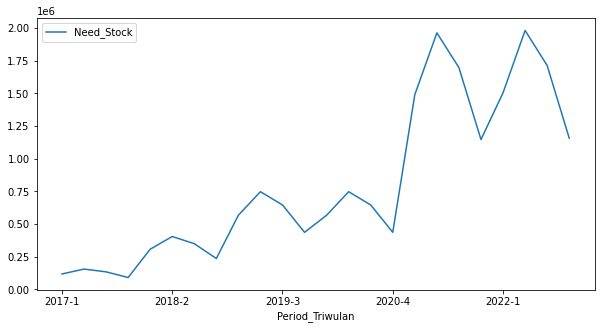

In [ ]:
df.plot(figsize=(10,5))
plt.show()

In [ ]:
df_train = df.iloc[:-4]
df_test = df.iloc[-4:]

Holt Winter's Exponential Smoothing (HWES) / Triple Exponential Smoothing

*   Level (alpha)
*   Trend (beta)
*   Seasonal (gamma)




In [ ]:
modelHWES = HWES(df_train,seasonal_periods=4, trend='add', seasonal='add')
fitted = modelHWES.fit()
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Need_Stock   No. Observations:                   20
Model:             ExponentialSmoothing   SSE                   887614150494.113
Optimized:                         True   AIC                            506.321
Trend:                         Additive   BIC                            514.287
Seasonal:                      Additive   AICC                           530.766
Seasonal Periods:                     4   Date:                 Thu, 16 Mar 2023
Box-Cox:                          False   Time:                         15:47:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9950000                alpha                 True
smoothing_trend          

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
stock_forecast = fitted.forecast(steps=4)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
fcastHWES = fitted.forecast(4)
print(fcastHolt)

20    1.187759e+06
21    1.225303e+06
22    1.262847e+06
23    1.300392e+06
Name: Holt's Linear Trend, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


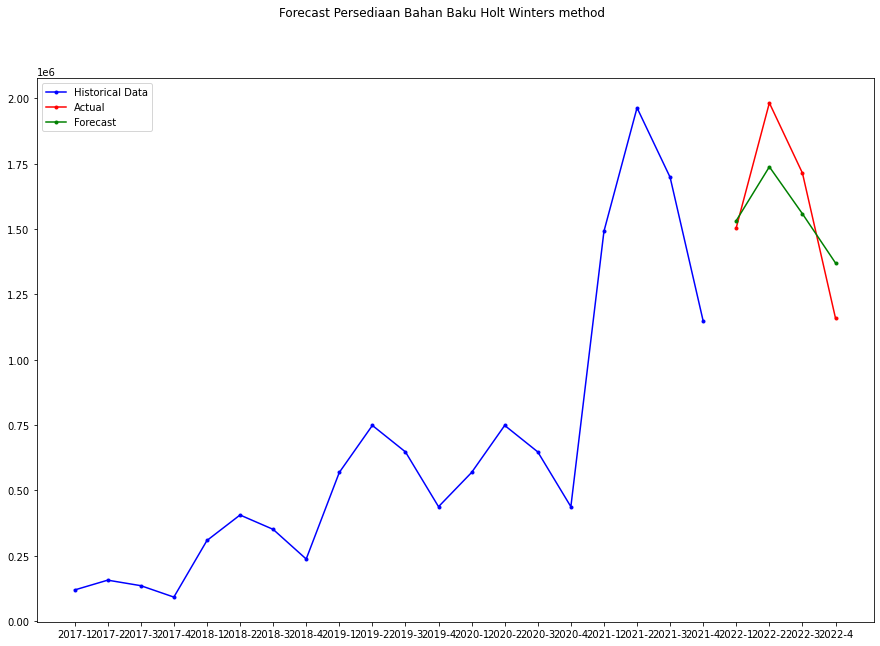

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Forecast Persediaan Bahan Baku Holt Winters method')
past, = plt.plot(df_train.index, df_train, 'b.-', label = 'Historical Data')
future, = plt.plot(df_test.index, df_test, 'r.-', label = 'Actual')
forecast_future, = plt.plot(df_test.index, stock_forecast, 'g.-', label = 'Forecast')
plt.legend(handles=[past, future, forecast_future])
plt.show()